In [2]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd

In [3]:
audio = 'snowfall.mp3'
y, sample_rate = librosa.load(audio)
ipd.Audio(audio)

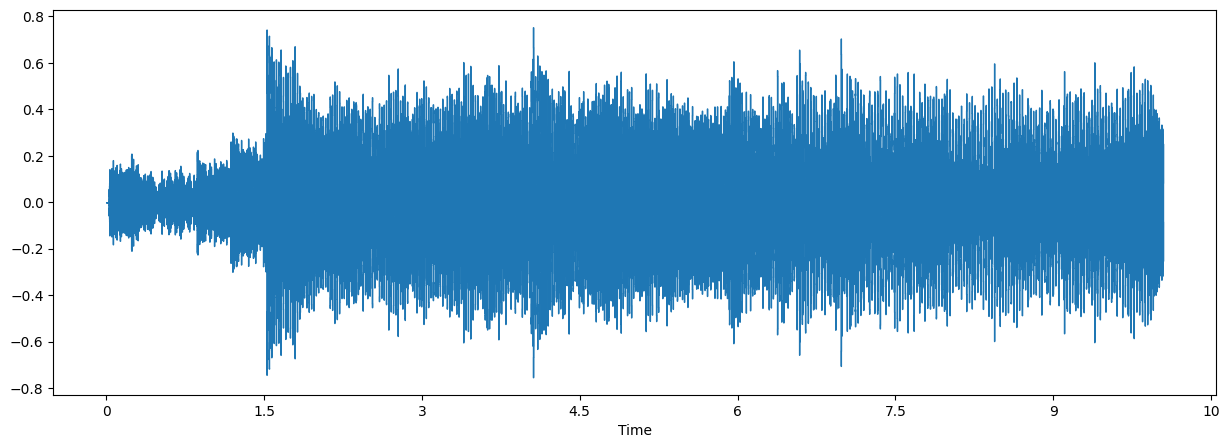

In [4]:
plt.figure(figsize=(15,5))
librosa.display.waveshow(y,sr = sample_rate)    #сигнал в амплитудно временной форме

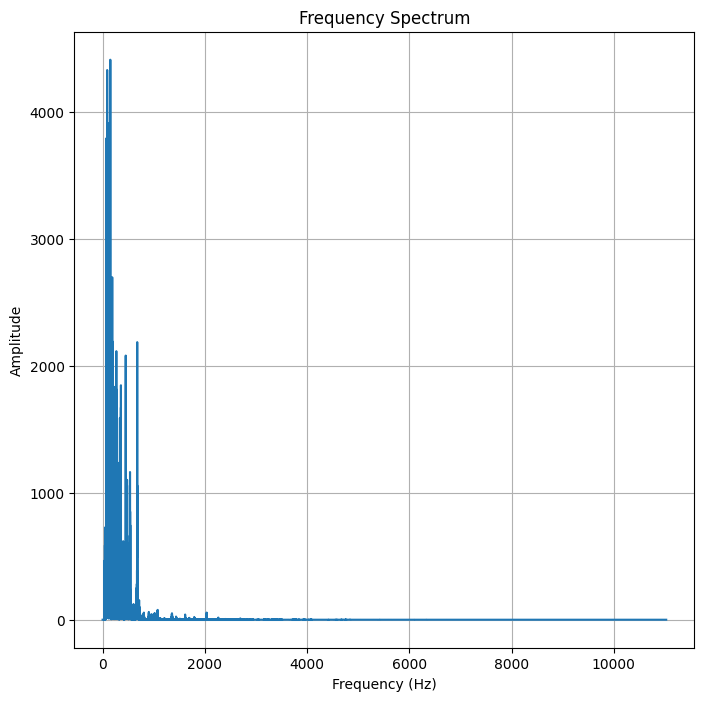

In [5]:
from scipy.fft import fft
spectrum = fft(y) #получаем спектр частот

frequencies = np.fft.fftfreq(len(spectrum), 1 / sample_rate) #значения частот
plt.figure(figsize=(8, 8))
plt.plot(frequencies[:len(frequencies)//2], np.abs(spectrum[:len(spectrum)//2])) # рассматриваем положительные частоты

plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'harmonic-b, percussive-r')

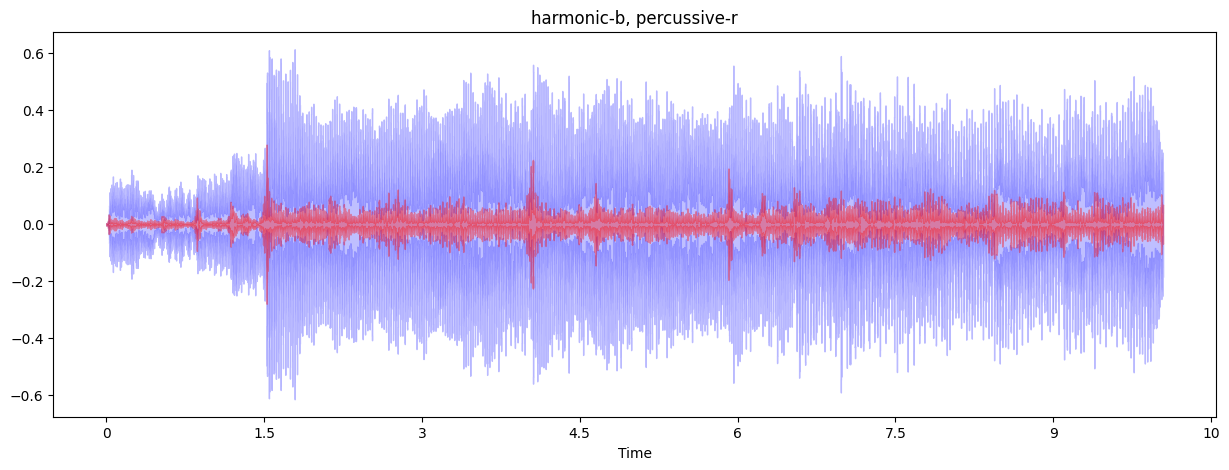

In [6]:
y_harmonic, y_percussive = librosa.effects.hpss(y) #разделяем на гармоническую составляющую (содержит более стабильные частоты (муз инструменты))
#и перкуссионные (ударные звуки или шумы)
plt.figure(figsize=(15,5))
librosa.display.waveshow(y_harmonic, sr = sample_rate, color='b', alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sample_rate, color='r', alpha=0.35)
plt.title("harmonic-b, percussive-r")

Temp: [95.703125] bpm
[ 1  2  3  4  5  6  7  8  9 10 11 12 13]


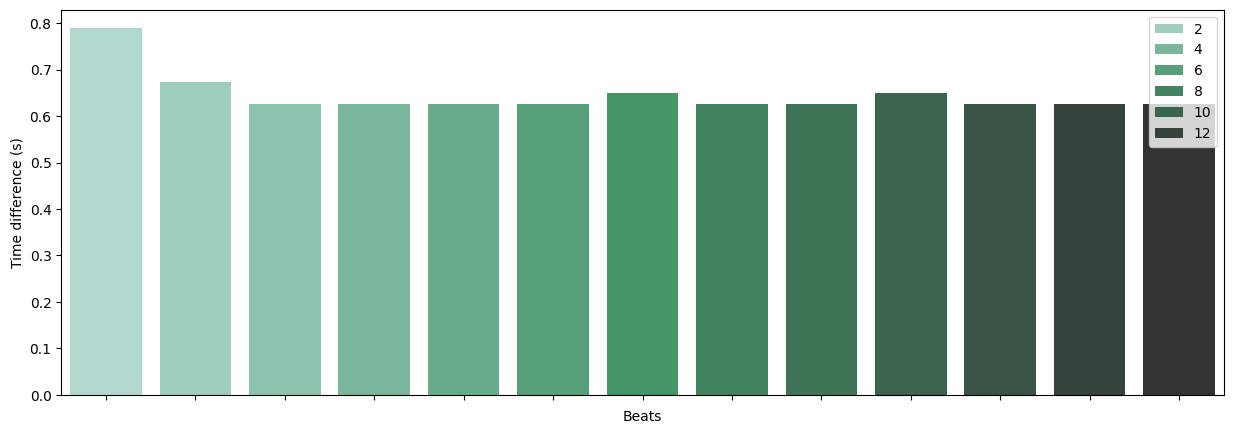

In [9]:
temp, beat_frames = librosa.beat.beat_track(y = y_percussive, sr= sample_rate)
print(f'Temp: {temp} bpm')

beat_times = librosa.frames_to_time(beat_frames,sr = sample_rate)
beat_nums = np.arange(1, np.size(beat_times))

print(beat_nums)

beat_time_diff = np.ediff1d(beat_times)

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(x = beat_nums, y = beat_time_diff,  palette="BuGn_d",hue=beat_nums, ax=ax) #нужно было явно задать аргументы
g=g.set(xticklabels=[])
# так же аргумент palette предполагает использование hue как приминение цвета к целевому классу

array([[-4.8442233e+02, -4.2942477e+02, -4.1237320e+02, ...,
        -3.6793936e+02, -3.7181985e+02, -3.4179907e+02],
       [ 1.2179706e+02,  1.6667020e+02,  1.7455566e+02, ...,
         2.1624820e+02,  2.1743742e+02,  2.2406534e+02],
       [ 6.0763706e+01,  5.6131119e+01,  4.6161186e+01, ...,
         7.2520004e+01,  7.5819199e+01,  5.9476624e+01],
       ...,
       [-5.7287149e+00, -9.3146400e+00, -1.1888813e+01, ...,
        -4.3812304e+00, -5.7911673e+00, -4.5827618e+00],
       [ 4.4191718e-02, -2.8381677e+00, -4.0071235e+00, ...,
         1.2521188e+01,  9.6392612e+00,  5.4970446e+00],
       [ 9.2767868e+00,  1.1956238e+01,  1.3387269e+01, ...,
         1.8284710e+01,  1.6285767e+01,  1.0905714e+01]], dtype=float32)

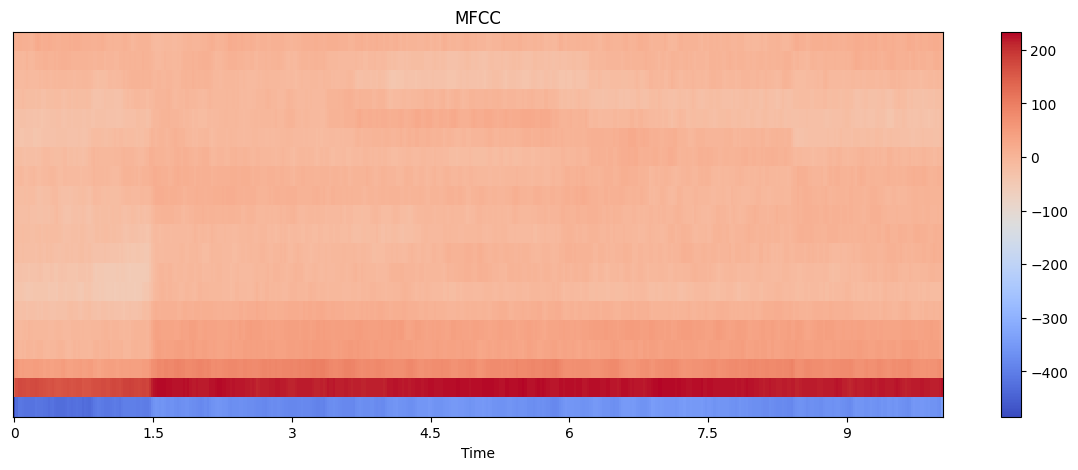

In [12]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sample_rate, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
mfccs  
#Мел-кепстральные коэффициенты (MFCC, Mel-frequency cepstral coefficients) — это 
#численные параметры, которые представляют 
#собой сжатое описание спектральных характеристик звукового сигнала. 

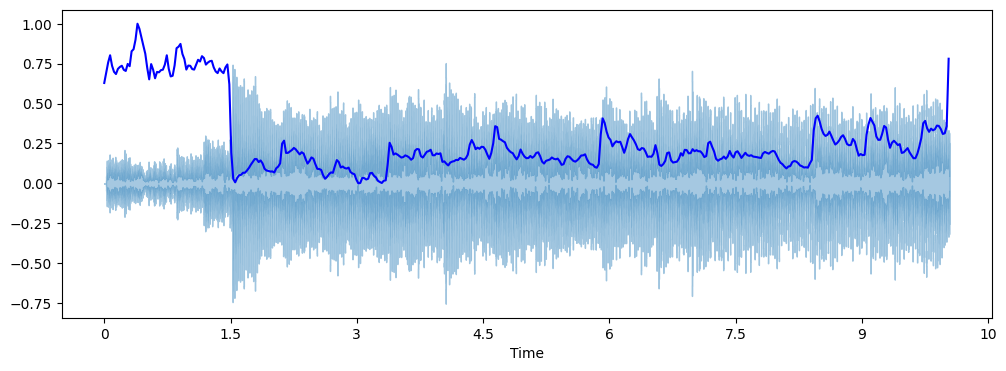

In [14]:
import sklearn
cent = librosa.feature.spectral_centroid(y=y, sr=sample_rate) #находим спектральный центроид для каждого фрейма
spectral_centroids = cent[0]
#временная переменная
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# построение 
librosa.display.waveshow(y, sr=sample_rate, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

In [ ]:
Гармоническая часть включает в себя компоненты, 
которые изменяются медленно и обладают устойчивой частотой или тоном. 
(музыкальные ноты полученный с помошью муз инструментов, голов человека,
любые звуки которые можно интерперетировать как мелодику)
Гармоническая часть часто обладает периодичностью, и ее удобно анализировать при изучении мелодии,
аккордов и других тональных элементов, которые составляют основу музыкального произведения.

Перкуссионная часть включает компоненты, которые изменяются быстро, создавая резкие всплески энергии. 
(Удары по барабанам, хлопки, щелчки и другие короткие шумы
Переходы с резкими изменениями громкости и частоты
Звуки, имеющие размытый спектр (шумы))
перкуссионные компоненты- основа ритма

разделение помогает улучшать алгоритмы анализа муз произведений, помогает при генерации новых звуковых 
файлов, это так же играет важную роль в обработве и улучшении качества звука